In [47]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# **Data**

In [48]:
drive.mount("/content/drive", force_remount=True)
root_dir = "/content/drive/MyDrive/"
base_dir = root_dir + "BP/"

Mounted at /content/drive


In [49]:
data_DF = pd.read_csv(f'{base_dir}' + 'norm_matrix.csv', delimiter=",", index_col=0)
data_DF

,Col_ASF1A_Fl_rep1.no_dups.bam,Col_ASF1A_Fl_rep2.no_dups.bam,Col_ASF1B_Fl_rep1.no_dups.bam,Col_ASF1B_Fl_rep2.no_dups.bam,Col_H31_Fl_rep1.no_dups.bam,Col_H31_Fl_rep2.no_dups.bam,Mut_H33_Fl_rep1.no_dups.bam,Mut_H33_Fl_rep2.no_dups.bam,Col_WT_Fl_rep1.no_dups.bam,Col_WT_Fl_rep2.no_dups.bam,...,Col_H3_rep2.no_dups.bam,Col_DNA_input.no_dups.bam,Mut_DNA_input.no_dups.bam,Col_H3K36me2_rep1.no_dups.bam,Col_H3K36me3_rep1.no_dups.bam,Col_Pol2_rep1.no_dups.bam,Col_Pol2_rep2.no_dups.bam,Mut_Pol2_rep2.no_dups.bam,Mut_H3K36me2_rep1.no_dups.bam,Mut_H3K36me3_rep1.no_dups.bam
AT1G01010,28.728475,27.323206,24.343433,26.923094,47.213606,43.414600,34.687524,39.187736,13.727315,29.620122,...,29.633744,28.510797,29.791898,50.901663,23.274725,22.841330,21.328048,25.812162,56.095169,21.457095
AT1G01020,40.647735,41.300684,32.089070,43.281929,47.246623,36.607620,48.906579,55.872470,25.493585,43.006139,...,28.209571,41.677794,40.580051,44.600219,38.839099,44.053613,36.988503,33.498451,39.191491,33.498067
AT1G01030,26.436309,24.914657,22.960283,28.026823,36.747373,33.070134,21.557219,24.128693,18.826032,21.265729,...,31.550899,26.652551,29.086519,29.476754,17.575770,36.254980,28.188819,33.727892,33.556931,22.998673
AT1G01040,119.345419,103.528101,90.457983,104.262935,166.502250,155.917372,172.501298,224.858886,69.813203,96.360333,...,111.140234,99.708149,106.636739,176.580460,235.093880,93.860885,89.488315,93.382668,230.203054,204.196549
AT1G01050,33.924050,29.060520,19.917354,34.412681,28.889445,22.136086,39.282043,40.727865,14.903942,20.696111,...,20.760053,29.891208,30.870713,30.176914,41.568851,42.077959,31.917499,30.859874,31.303108,38.122800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01250,628.817411,954.456441,974.843829,777.734483,160.691345,114.110721,164.575210,257.030477,2900.777790,1451.196102,...,101.061474,202.230213,158.046435,31.437203,25.334011,131.952876,493.378909,408.749933,35.873361,27.165099
ATCG01270,137.529932,215.347926,215.771335,164.652658,39.751876,25.351983,35.994023,51.679896,616.160344,342.245319,...,19.390657,30.103579,23.526471,4.060930,3.687559,19.652556,85.610488,71.815172,5.321528,3.458134
ATCG01280,2017.258478,2698.364007,3162.986474,2156.725127,544.772382,382.691660,541.391035,828.247341,8691.351517,3825.932417,...,340.979770,736.343089,575.464953,113.636037,81.126305,480.638437,1759.340268,1449.840487,127.278436,95.077847
ATCG01300,169.925871,294.593121,270.544059,214.596377,39.553777,29.103862,37.344071,63.316429,948.753579,474.871314,...,22.184226,35.200481,27.509789,5.811332,4.405915,22.945312,93.664436,81.336992,6.573653,4.874719


In [35]:
subm1 = pd.read_csv(f'{base_dir}' + 'submatrices/' + 'submatrix_my.csv', delimiter=",", index_col=0)
smaller = subm1.head(10)
smaller

,Col_ASF1A_Fl_rep1.no_dups.bam,Col_ASF1A_Fl_rep2.no_dups.bam,Col_ASF1B_Fl_rep1.no_dups.bam,Col_ASF1B_Fl_rep2.no_dups.bam,Col_H31_Fl_rep1.no_dups.bam,Col_H31_Fl_rep2.no_dups.bam,Mut_H33_Fl_rep1.no_dups.bam,Mut_H33_Fl_rep2.no_dups.bam,Col_WT_Fl_rep1.no_dups.bam,Col_WT_Fl_rep2.no_dups.bam,...,Col_H3_rep2.no_dups.bam,Col_DNA_input.no_dups.bam,Mut_DNA_input.no_dups.bam,Col_H3K36me2_rep1.no_dups.bam,Col_H3K36me3_rep1.no_dups.bam,Col_Pol2_rep1.no_dups.bam,Col_Pol2_rep2.no_dups.bam,Mut_Pol2_rep2.no_dups.bam,Mut_H3K36me2_rep1.no_dups.bam,Mut_H3K36me3_rep1.no_dups.bam
AT4G25130,24.908199,21.913843,21.300504,23.611909,19.149575,11.094842,20.903970,23.016378,21.179286,25.253053,...,18.130812,21.608742,21.742277,23.665422,51.434269,33.066205,29.232849,30.286271,16.528041,48.997172
AT4G25140,14.364237,15.122526,13.554866,14.427310,21.196598,18.062618,24.213765,25.583260,9.413016,13.860698,...,17.199622,15.449985,15.933271,15.123465,5.698955,13.032383,13.124953,11.586793,11.206513,5.791332
AT4G25150,21.240734,20.216014,17.704315,18.093265,18.951476,13.345970,23.865365,23.444191,11.766270,22.025219,...,21.526916,24.316471,24.397822,35.918230,26.148148,21.801513,22.819520,20.879171,37.501123,25.123550
AT4G27130,30.715018,27.718050,22.130393,33.939655,24.861431,16.401071,29.200232,34.481785,12.158479,22.784709,...,22.622433,29.201002,30.123841,27.656337,52.631529,44.816146,41.462919,37.513676,20.660051,53.080270
AT4G27150,12.072072,12.713977,29.876031,10.840192,27.832916,32.158963,12.607707,16.256921,14.511733,12.151845,...,19.116777,9.875248,8.381565,4.551043,4.022792,4.991125,7.755654,8.030451,3.318129,3.333141
AT4G28510,23.685710,23.414250,25.173322,21.483289,44.110055,37.947576,27.937284,32.513842,16.080569,21.930283,...,31.605675,32.068010,31.908036,54.472481,43.771808,24.747663,23.714403,25.582721,64.233977,41.997576
AT4G28520,26.894742,27.915472,48.963495,27.987404,72.867433,75.627161,38.127969,42.781371,42.750781,26.392288,...,42.999055,29.254095,28.215168,10.782471,8.811830,16.567763,22.372079,23.058865,10.016994,9.374459
AT4G28530,42.939901,48.052517,30.982551,45.016360,89.045522,93.260993,49.015454,56.642535,23.532540,50.506105,...,44.970987,64.826225,67.923868,18.344203,10.487993,46.826461,34.303854,39.349208,15.651554,11.041030
AT4G28540,46.148933,36.957400,36.515149,45.252873,57.283641,43.361002,63.778882,70.931513,26.278003,32.563147,...,42.889504,56.490666,56.181379,59.163556,87.064712,51.159035,52.648959,50.132956,58.975055,88.161579
AT4G29273,4.737142,6.672864,4.149449,5.558062,9.937969,9.486894,7.643014,9.839715,8.236389,7.594903,...,7.668621,6.477313,6.597370,1.400321,0.814136,3.258096,2.982944,3.441622,1.377337,0.749957


# **PyExplorReg**

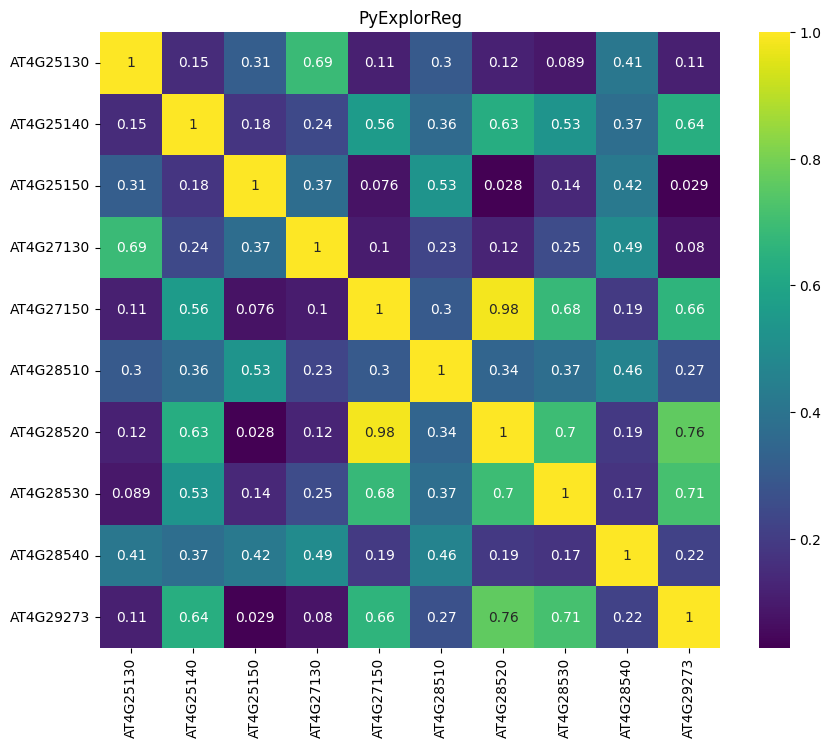

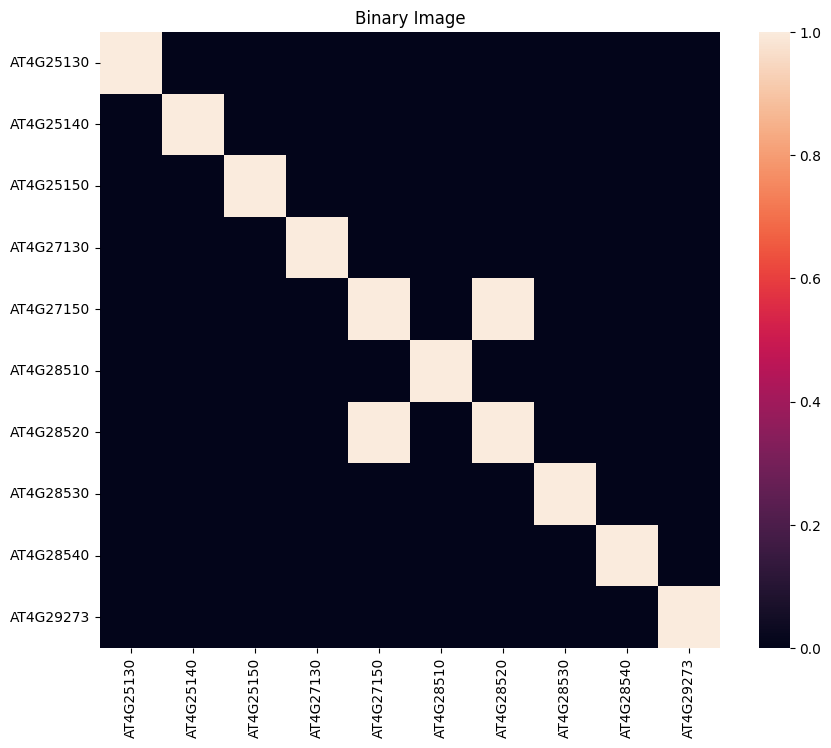

Number of genes 10
Number of regulons 6


In [38]:
data_DF = smaller.T

# Calculate Correlation Coefficient Matrix
cc_matrix = data_DF.corr()

# Calculate Mutual Information Matrix
# Prepare an empty matrix for MI with the same dimensions as cc_matrix
mi_matrix = pd.DataFrame(index=data_DF.columns, columns=data_DF.columns, data=0.0)

for i, column1 in enumerate(data_DF.columns):
    for j, column2 in enumerate(data_DF.columns):
        if i >= j:  # To avoid redundancy, MI between two variables is symmetric
            continue
        mi_score = mutual_info_regression(data_DF[[column1]], data_DF[column2], discrete_features='auto')
        mi_matrix.at[column1, column2] = mi_score
        mi_matrix.at[column2, column1] = mi_score  # MI is symmetric

# Normalize both matrices to have values between 0 and 1
cc_matrix_normalized = (cc_matrix - cc_matrix.min().min()) / (cc_matrix.max().max() - cc_matrix.min().min())
mi_matrix_normalized = (mi_matrix - mi_matrix.min().min()) / (mi_matrix.max().max() - mi_matrix.min().min())

# Intersection
intersection_matrix = (cc_matrix_normalized + mi_matrix_normalized) / 2

# Correcting the diagonal values in the intersection matrix
np.fill_diagonal(intersection_matrix.values, 1)

# Visualization
plt.figure(figsize=(10, 8))
plt.title('PyExplorReg')
sns.heatmap(intersection_matrix, annot=True, cmap='viridis', xticklabels=intersection_matrix.columns, yticklabels=intersection_matrix.columns)
plt.show()

threshold = 0.8

binary_matrix = np.where(intersection_matrix >= threshold, 1, 0)

binary_df = pd.DataFrame(binary_matrix, columns=intersection_matrix.columns, index=intersection_matrix.index)

plt.figure(figsize=(10, 8))
sns.heatmap(binary_df)
plt.title(f'Binary Image')
plt.show()

num_of_genes = len(smaller)
print(f"Number of genes {num_of_genes}")

num_of_regulons = (np.sum(binary_matrix)) // 2
print(f"Number of regulons {num_of_regulons}")


<ipython-input-46-3f9ad499c482>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  upgma_tree = linkage(distance_matrix, method='average')


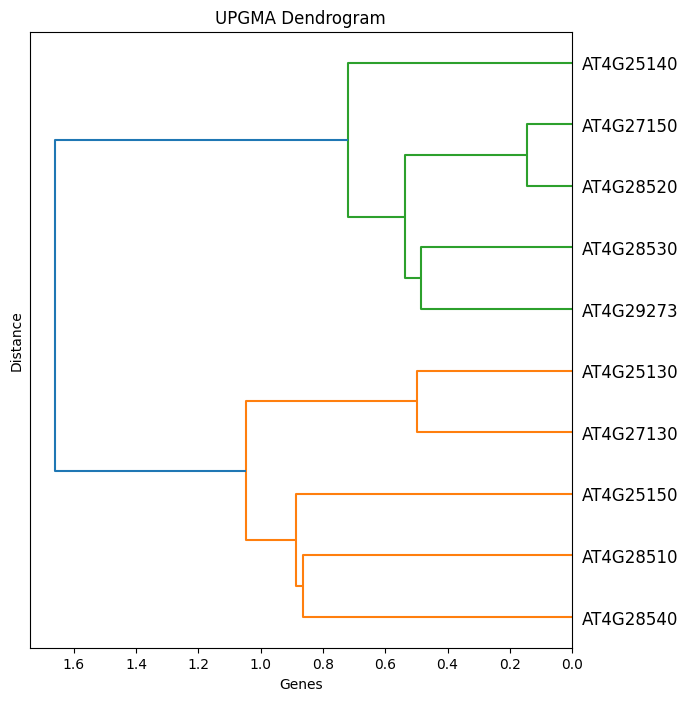

In [46]:
# Calculate the Distance Matrix
distance_matrix = 1 - intersection_matrix  # Convert similarity to distance

# Apply UPGMA
upgma_tree = linkage(distance_matrix, method='average')

# Update Visualization
# Plot the UPGMA dendrogram
plt.figure(figsize=(7, 8))
dendrogram(upgma_tree, labels=intersection_matrix.columns, orientation='left', distance_sort='descending')
plt.title('UPGMA Dendrogram')
plt.xlabel('Genes')
plt.ylabel('Distance')
plt.show()